In [223]:
import numpy as np
from tools import *
from fitters import *
from plots import *
import seaborn as sns
sns.set_theme()
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [649]:
def test_run(noise=0, beta=0,  dim=6, alcs=[[1], [2.8], [0], [1]], start_end=(-1, 1), dt=0.01, iteration=0):

    time = np.arange(start_end[0], start_end[1]+dt, dt)
    a, l, c, s = alcs[0], alcs[1], alcs[2], alcs[3]
    X_series = build_signal_grid(time, noise=noise, a_s=a, l_s=l, c_s=c, s_s=s)

    # ALGO
    Xhan = build_hankel(X_series, dim)
    X0 = Xhan[:, :-1]
    Xp = Xhan[:, 1:]
    lam = beta * np.eye(dim)

    X0Xp = X0 @ Xp.T
    X0X0 = X0 @ X0.T
    # solve eigenvalue problem
    w, vl = scipy.linalg.eig(
        X0Xp, (X0X0+lam), overwrite_a=True, overwrite_b=True)

    theta = vl[:, np.nanargmax(np.abs(w))]
    w = np.sort(np.abs(w))[::-1]

    theta /= theta[-1]
    pred_eig = theta.real @ Xhan
    pred_eig /= pred_eig[0]

    # X Corr
    X_centered = X_series - X_series.mean()
    XXT = np.outer(X_centered, X_centered.T)
    wXXt = np.sort(scipy.linalg.eig(XXT)[0])[::-1]

    result = {
        'Time': time,
        'X_series': X_series,
        'X_fft': np.fft.fft(X_series).real, 
        'fft_freq': np.fft.fftfreq(X_series.shape[-1]),
        'Pred Eig Left': pred_eig,
        'Eig Vec (REAL)': theta.real,
        'Eig Vec (IMAG)': theta.imag,
        'Eig Vals (MAG)': np.abs(w),
        'Eig Vals (REAL)': w.real,
        'Eig Vals (IMAG)': w.imag,
        'Spec X@XT': wXXt,
        'lam1': [np.exp(l[0]*dt)]*len(w),
        'lam2': [np.exp(-l[0]*dt)]*len(w),
        'Eig-X': np.arange(0,dim),
        'lam1-X': [0],
        'lam2-X': [1]

    }

    return result


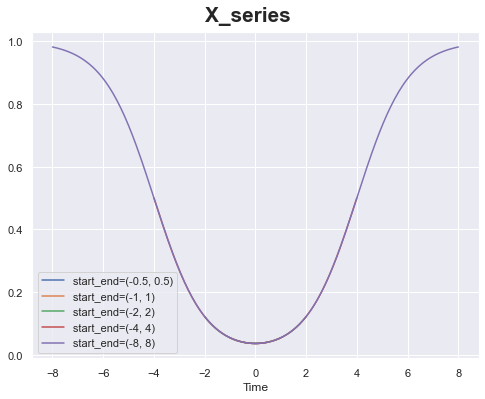

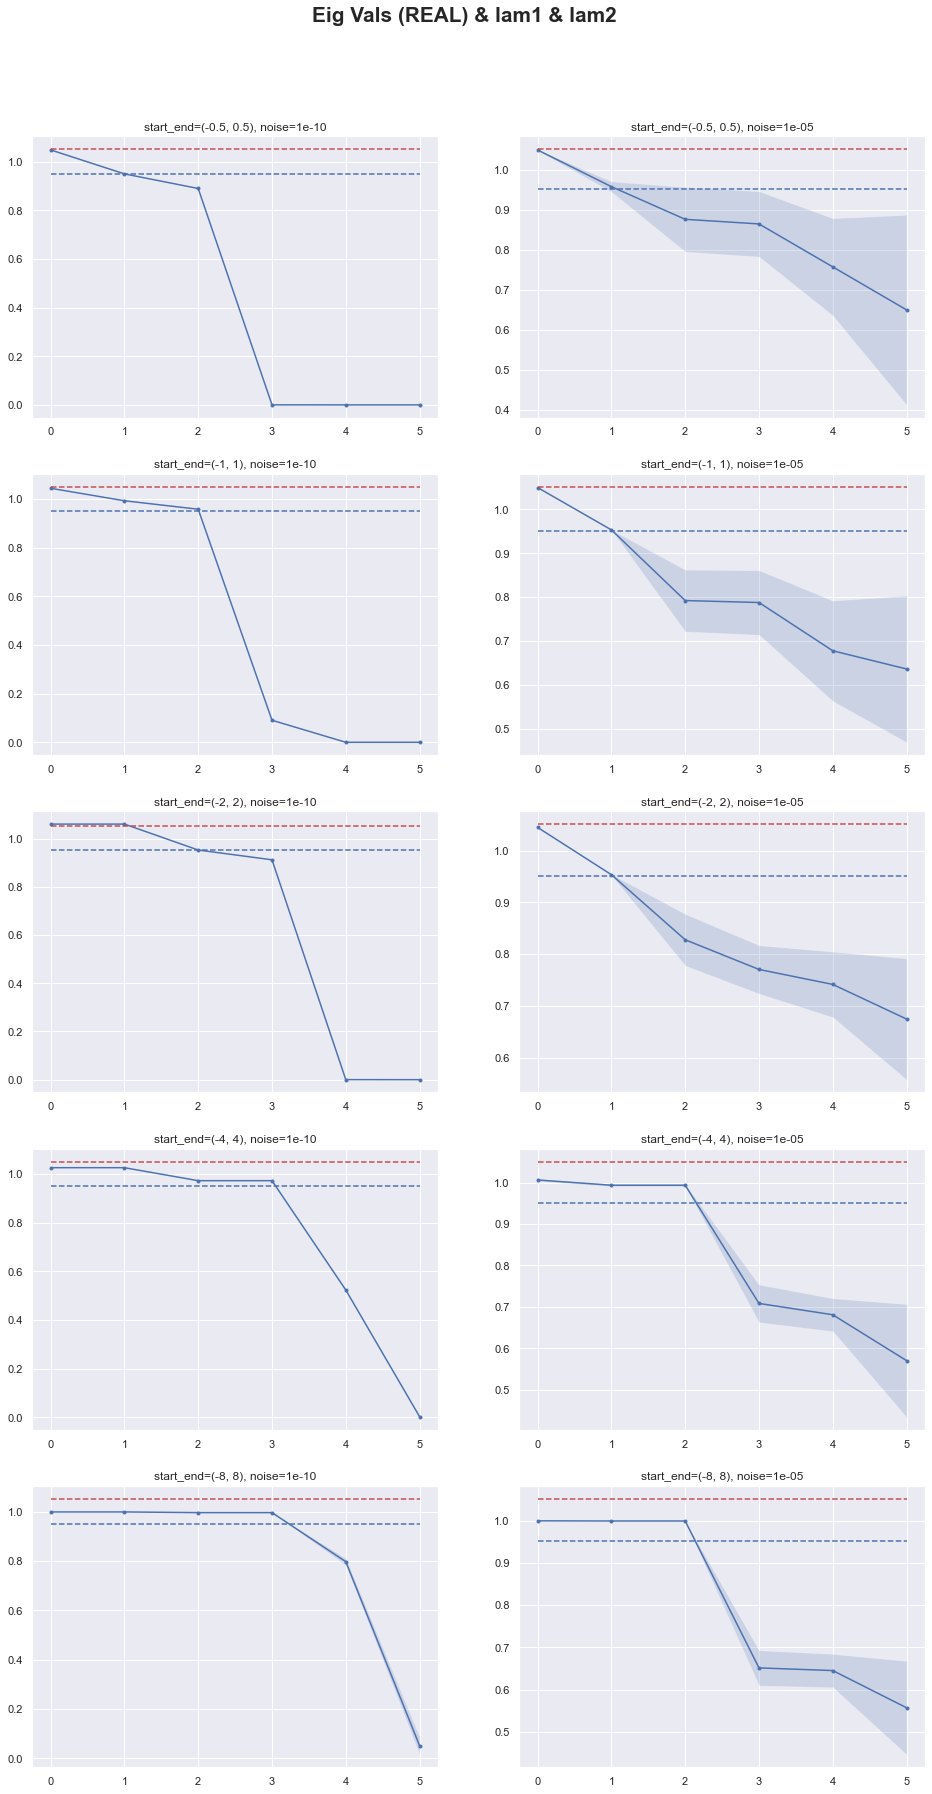

In [651]:
params = {
    'dt': [0.05],
    'noise': [1e-10,1e-5],
    'beta': [1e-12],
    'start_end': [(-8, 8),(-4, 4),(-2, 2),(-1, 1),(-0.5, 0.5)],
    'dim': [6],
    'alcs': [[[1, 1], [1, -1], [-4,4], [1, 1]]],
    'iteration': np.arange(30),
}
results = param_runner(test_run, params)
plot_dataframe(results, 'X_series',  x_col='Time',  line_cols = ['start_end'], aggregate='error', legend=True)
plot_dataframe(results, ['Eig Vals (REAL)', 'lam1', 'lam2'], title_cols=['start_end', 'noise'], legend=False,  val_styles=[['.-'], ['r--'], ['b--']])

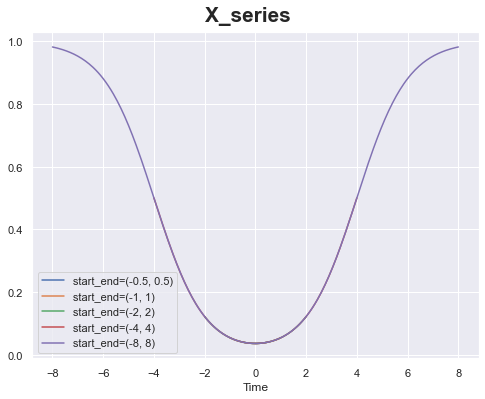

In [646]:
rank = 10
draws = 1
start_end = (-2, 2)
size = (draws, rank)
a = np.random.uniform(-1, 1, size=size)
l = np.random.uniform(-2, 2, size=size)
c = np.random.uniform(start_end[0], start_end[1], size=size)
s = np.random.randint(2, size=size)
s[s == 0] = -1

alcs = np.dstack((a, l, c, s))
alcs = np.swapaxes(alcs, 1, 2)

params = {
    'dt': [0.05],
    'noise': [1e-10,1e-5],
    'beta': [1e-12],
    'start_end': [(-8, 8),(-4, 4),(-2, 2),(-1, 1),(-0.5, 0.5)],
    'dim': [6],
    'alcs': alcs,
    'iteration': np.arange(30),
}
results = param_runner(test_run, params)
plot_dataframe(results, 'X_series',  x_col='Time',  line_cols = ['start_end'], aggregate='error', legend=True)
plot_dataframe(results, ['Eig Vals (REAL)', 'lam1', 'lam2'], title_cols=['start_end', 'noise'], legend=False,  val_styles=[['.-'], ['r--'], ['b--']])

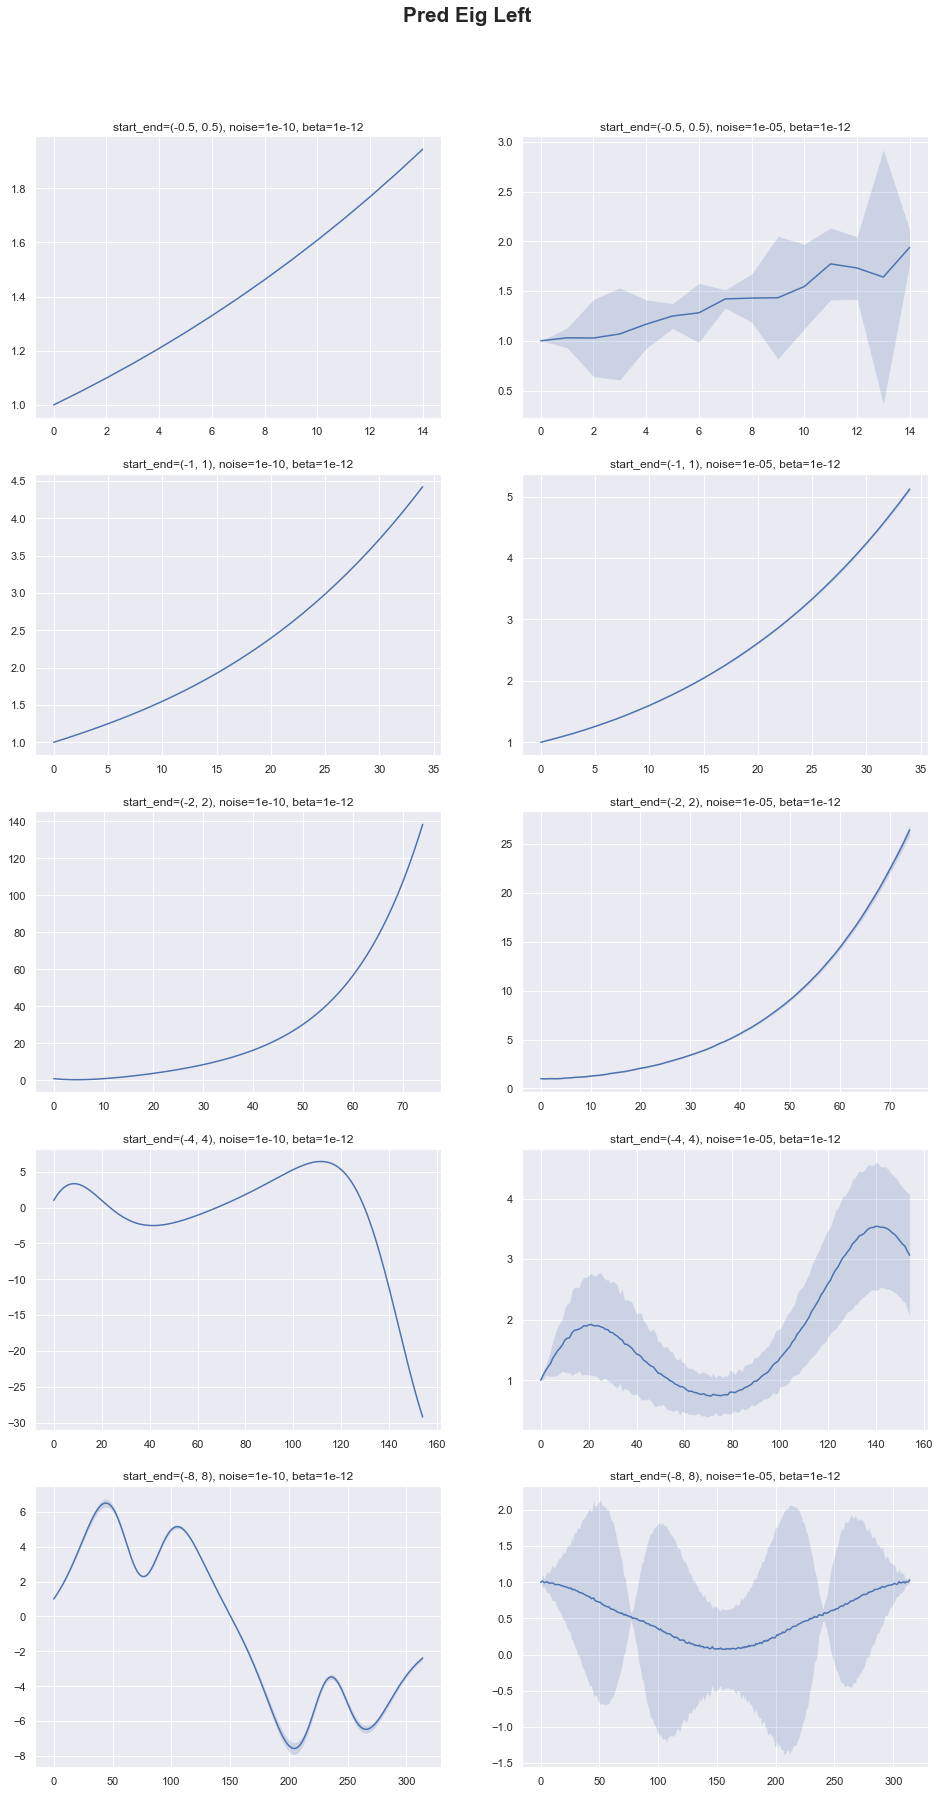

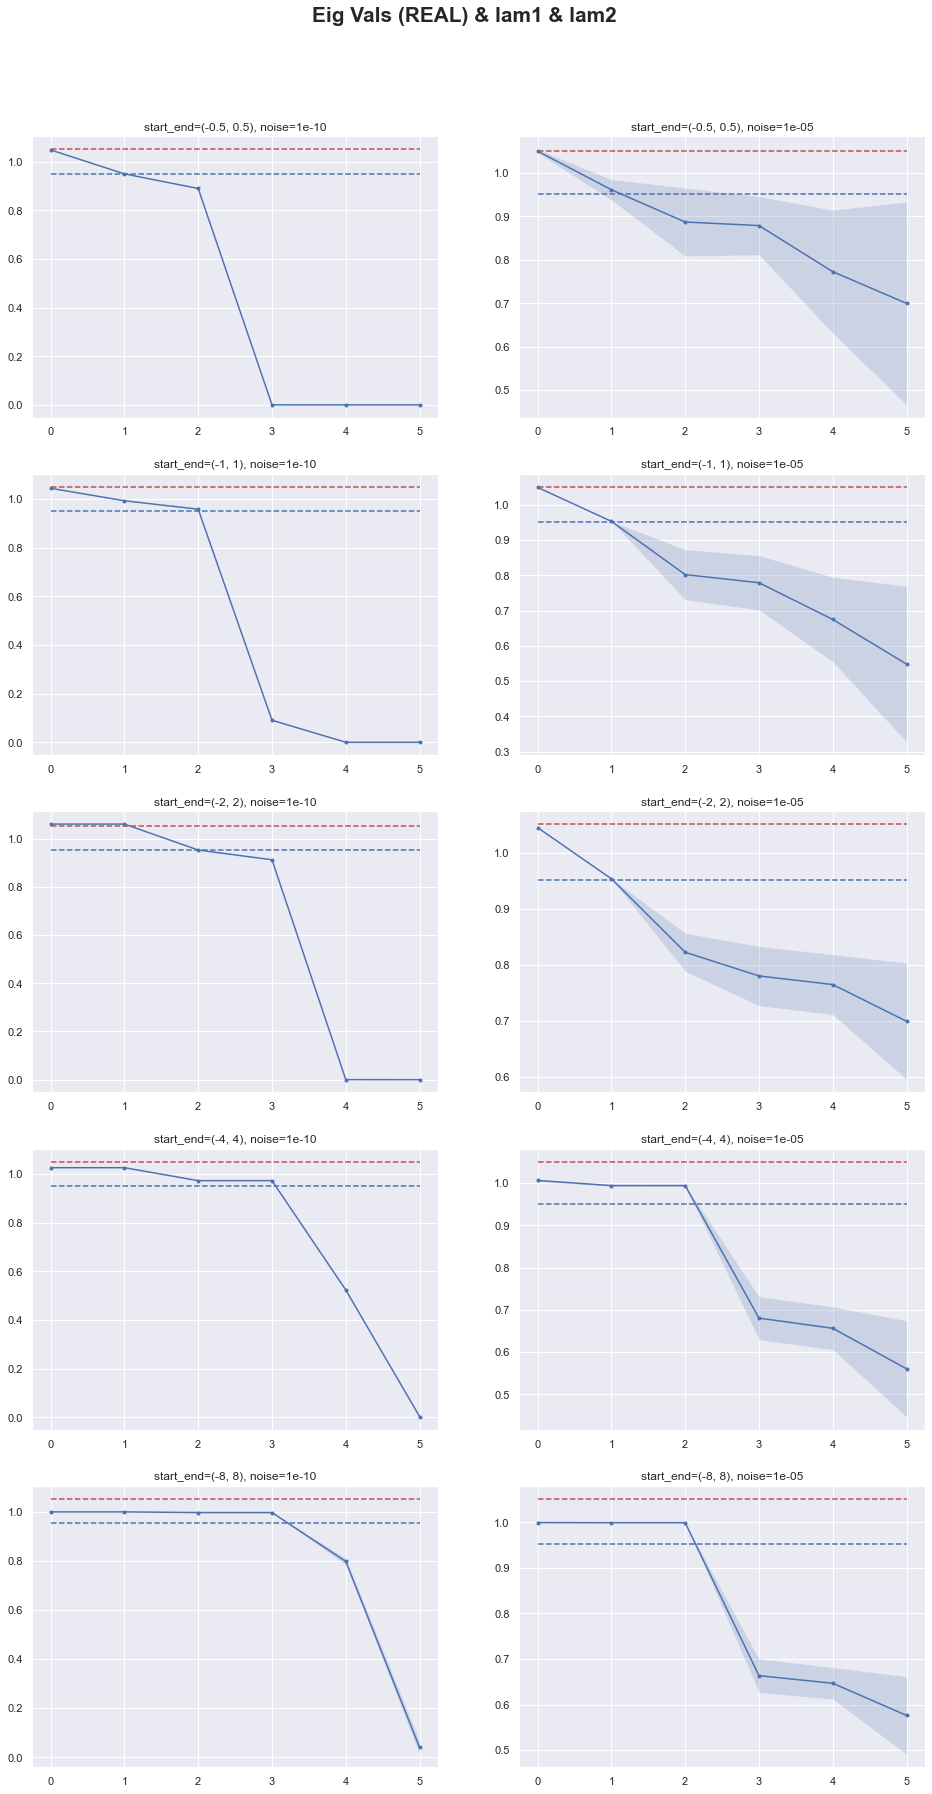

In [648]:

# plot_dataframe(results,  ['Pred Eig Left'], title_cols=['start_end', 'noise', 'beta'], legend=False)
# plot_dataframe(results, 'Eig Vec (REAL)',title_cols=['start_end', 'noise', 'beta'], legend=False)
# plot_dataframe(results, 'Eig Vec (IMAG)',title_cols=['start_end', 'noise', 'beta'], legend=False)
plot_dataframe(results, ['Eig Vals (REAL)', 'lam1', 'lam2'], title_cols=['start_end', 'noise'], legend=False,  val_styles=[['.-'], ['r--'], ['b--']])
# plot_dataframe(results, 'Eig Vals (IMAG)', title_cols=['start_end', 'noise', 'beta'], legend=False,  val_styles=[['.-']])
